In [105]:
import pandas as pd
import numpy as np
import sys
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [106]:
df = pd.read_excel("D:\Assignment\EastWestAirlines.xlsx")

In [107]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [108]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [110]:
df.shape

(3999, 12)

In [111]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [112]:
df1 = df.drop(['ID#'], axis= 1)

In [113]:
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [114]:
df_norm = pd.DataFrame(normalize(df1), columns=df1.columns)

In [115]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


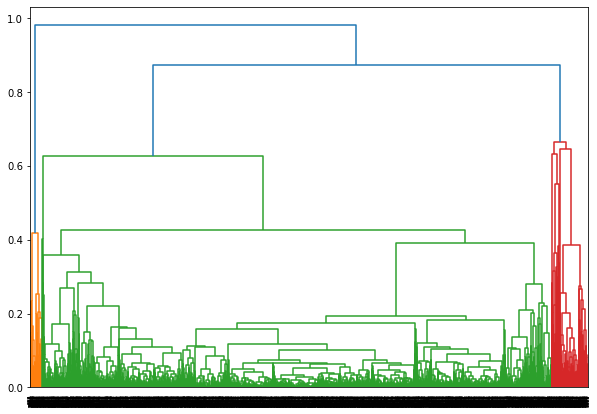

In [116]:
plt.figure(figsize= (10,7)) 
dend = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [117]:
high_clus = AgglomerativeClustering(n_clusters=5, affinity= 'euclidean', linkage= 'average')

In [118]:
high_clus

AgglomerativeClustering(linkage='average', n_clusters=5)

In [119]:
pre_clus = high_clus.fit_predict(df_norm)
Cluster = pd.DataFrame(pre_clus, columns= ['Cluster'])
Cluster

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
3994,2
3995,2
3996,2
3997,2


In [120]:
airline = pd.concat([df_norm,Cluster], axis=1)

In [121]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,2
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,2
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,2
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,2
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,2
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,2
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,2
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,2


In [122]:
airline.sort_values("Cluster")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
2544,0.654451,0.0,0.000131,0.000131,0.000131,0.654451,0.000131,0.000000,0.000000,0.378665,0.000000,0
183,0.609163,0.0,0.000136,0.000068,0.000068,0.604185,0.000955,0.000000,0.000000,0.513693,0.000068,0
1517,0.289854,0.0,0.000104,0.000104,0.000104,0.830228,0.000311,0.000000,0.000000,0.476136,0.000104,0
1346,0.690704,0.0,0.000130,0.000130,0.000130,0.295367,0.001168,0.000000,0.000000,0.660064,0.000000,0
2486,0.599441,0.0,0.000134,0.000134,0.000134,0.637209,0.001882,0.244077,0.000134,0.418399,0.000134,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3331,0.560504,0.0,0.000119,0.000040,0.000040,0.824505,0.000637,0.000000,0.000000,0.077631,0.000040,3
904,0.139598,0.0,0.000018,0.000009,0.000044,0.988876,0.000141,0.000000,0.000000,0.051352,0.000009,3
1810,0.517728,0.0,0.000068,0.000014,0.000014,0.853549,0.000382,0.000000,0.000000,0.058412,0.000014,3
528,0.115902,0.0,0.000086,0.000021,0.000021,0.983135,0.000471,0.000000,0.000000,0.141461,0.000021,3


In [123]:
airline.Cluster.value_counts()

2    3651
3     202
1      87
0      58
4       1
Name: Cluster, dtype: int64

In [124]:
airline.groupby('Cluster').agg(['mean']). reset_index()

,Cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.534126,0.003755,0.000205,0.000196,0.000193,0.545142,0.001187,0.070337,0.000247,0.555414,0.000083
1,1,0.407684,0.000000,0.000227,0.000227,0.000227,0.072430,0.000415,0.003865,0.000020,0.877760,0.000022
2,2,0.942055,0.003083,0.000053,0.000041,0.000040,0.199444,0.000246,0.006641,0.000021,0.113162,0.000007
3,3,0.397275,0.001937,0.000085,0.000032,0.000032,0.884737,0.000463,0.013036,0.000036,0.114247,0.000031
4,4,0.000000,0.000000,0.000149,0.000149,0.000149,0.819511,0.002686,0.315805,0.000746,0.478185,0.000149


K Means

In [133]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1, 11):
    K_Means = KMeans(n_clusters= i, random_state= 42, init= 'k-means++', max_iter= 300, n_init= 10)
    K_Means.fit(airline)
    wcss.append(K_Means.inertia_)

In [129]:
wcss

[]

<function matplotlib.pyplot.show(close=None, block=None)>

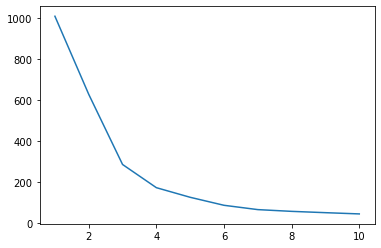

In [134]:
plt.plot(range(1,11), wcss)
plt.show

DBSCAN

In [172]:
a = df1.values

In [173]:
a

array([[  28143,       0,       1,       1,       1,     174,       1,
              0,       0,    7000,       0],
       [  19244,       0,       1,       1,       1,     215,       2,
              0,       0,    6968,       0],
       [  41354,       0,       1,       1,       1,    4123,       4,
              0,       0,    7034,       0],
       [  14776,       0,       1,       1,       1,     500,       1,
              0,       0,    6952,       0],
       [  97752,       0,       4,       1,       1,   43300,      26,
           2077,       4,    6935,       1],
       [  16420,       0,       1,       1,       1,       0,       0,
              0,       0,    6942,       0],
       [  84914,       0,       3,       1,       1,   27482,      25,
              0,       0,    6994,       0],
       [  20856,       0,       1,       1,       1,    5250,       4,
            250,       1,    6938,       1],
       [ 443003,       0,       3,       2,       1,    1753,      43,
 

In [184]:
df_std = StandardScaler().fit(a)
X1 = df_std.transform(a)

In [209]:
df_db = DBSCAN(eps=5, min_samples=5)

In [210]:
dbval = df_db.fit_predict(X1)

In [211]:
np.unique(dbval)

array([-1,  0,  1,  2,  3], dtype=int64)

In [212]:
db_clus = pd.DataFrame(dbval, columns=['dbclus'])

In [213]:
db_air = pd.concat([df1, db_clus], axis= 1)

In [214]:
db_air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbclus
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [215]:
db_air.groupby("dbclus").agg(['mean']).reset_index()

,dbclus,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,261830.750000,619.000000,2.800000,1.0,2.7,71011.750000,35.000000,5490.200000,14.100000,4201.900000,0.700000
1,0,72659.193081,143.203765,2.063851,1.0,1.0,16804.893920,11.398372,433.440855,1.300687,4118.994149,0.368354
2,1,52231.400000,66.666667,1.000000,3.0,1.0,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000
3,2,77793.642857,0.000000,1.214286,2.0,1.0,11625.214286,16.785714,523.678571,1.678571,3911.821429,0.392857
4,3,102022.600000,0.000000,3.600000,1.0,4.0,90060.800000,27.000000,210.000000,0.600000,4730.200000,0.400000


In [216]:
db_air['dbclus'].value_counts()

 0    3931
 2      28
-1      20
 1      15
 3       5
Name: dbclus, dtype: int64